# 은행 대출 승인 예측 분류


## 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd

pd.set_option("display.float_format", lambda x: "%.2f" % x)

In [2]:
df = pd.read_csv("data/loan_data.csv")
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.00,female,Master,71948.00,0,RENT,35000.00,PERSONAL,16.02,0.49,3.00,561,No,1
1,21.00,female,High School,12282.00,0,OWN,1000.00,EDUCATION,11.14,0.08,2.00,504,Yes,0
2,25.00,female,High School,12438.00,3,MORTGAGE,5500.00,MEDICAL,12.87,0.44,3.00,635,No,1
3,23.00,female,Bachelor,79753.00,0,RENT,35000.00,MEDICAL,15.23,0.44,2.00,675,No,1
4,24.00,male,Master,66135.00,1,RENT,35000.00,MEDICAL,14.27,0.53,4.00,586,No,1


In [3]:
columns_english_to_korean = {
    "person_age": "나이",
    "person_gender": "성별",
    "person_education": "최고교육수준",
    "person_income": "연간소득",
    "person_emp_exp": "직장경력",
    "person_home_ownership": "주택소유상태",
    "loan_amnt": "대출금액",
    "loan_intent": "대출목적",
    "loan_int_rate": "금리",
    "loan_percent_income": "소득대비대출비율",
    "cb_person_cred_hist_length": "신용기록기간",
    "credit_score": "신용점수",
    "previous_loan_defaults_on_file": "이전연체여부",
    "loan_status": "대출승인여부",
}

df.rename(columns=columns_english_to_korean, inplace=True)
df.head()

,나이,성별,최고교육수준,연간소득,직장경력,주택소유상태,대출금액,대출목적,금리,소득대비대출비율,신용기록기간,신용점수,이전연체여부,대출승인여부
0,22.00,female,Master,71948.00,0,RENT,35000.00,PERSONAL,16.02,0.49,3.00,561,No,1
1,21.00,female,High School,12282.00,0,OWN,1000.00,EDUCATION,11.14,0.08,2.00,504,Yes,0
2,25.00,female,High School,12438.00,3,MORTGAGE,5500.00,MEDICAL,12.87,0.44,3.00,635,No,1
3,23.00,female,Bachelor,79753.00,0,RENT,35000.00,MEDICAL,15.23,0.44,2.00,675,No,1
4,24.00,male,Master,66135.00,1,RENT,35000.00,MEDICAL,14.27,0.53,4.00,586,No,1


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   나이        45000 non-null  float64
 1   성별        45000 non-null  object 
 2   최고교육수준    45000 non-null  object 
 3   연간소득      45000 non-null  float64
 4   직장경력      45000 non-null  int64  
 5   주택소유상태    45000 non-null  object 
 6   대출금액      45000 non-null  float64
 7   대출목적      45000 non-null  object 
 8   금리        45000 non-null  float64
 9   소득대비대출비율  45000 non-null  float64
 10  신용기록기간    45000 non-null  float64
 11  신용점수      45000 non-null  int64  
 12  이전연체여부    45000 non-null  object 
 13  대출승인여부    45000 non-null  int64  
dtypes: float64(6), int64(3), object(5)
memory usage: 4.8+ MB


,나이,연간소득,직장경력,대출금액,금리,소득대비대출비율,신용기록기간,신용점수,대출승인여부
count,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00
mean,27.76,80319.05,5.41,9583.16,11.01,0.14,5.87,632.61,0.22
std,6.05,80422.50,6.06,6314.89,2.98,0.09,3.88,50.44,0.42
min,20.00,8000.00,0.00,500.00,5.42,0.00,2.00,390.00,0.00
25%,24.00,47204.00,1.00,5000.00,8.59,0.07,3.00,601.00,0.00
50%,26.00,67048.00,4.00,8000.00,11.01,0.12,4.00,640.00,0.00
75%,30.00,95789.25,8.00,12237.25,12.99,0.19,8.00,670.00,0.00
max,144.00,7200766.00,125.00,35000.00,20.00,0.66,30.00,850.00,1.00


In [5]:
from sklearn.preprocessing import LabelEncoder

# 범주형 데이터 컬럼
categorical_columns = ["성별", "최고교육수준", "주택소유상태", "대출목적", "이전연체여부"]

# 각 컬럼의 유니크 값 확인
display(df[categorical_columns].head())

# 범주형 데이터 레이블 인코딩
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

display(df[categorical_columns].head())

,성별,최고교육수준,주택소유상태,대출목적,이전연체여부
0,female,Master,RENT,PERSONAL,No
1,female,High School,OWN,EDUCATION,Yes
2,female,High School,MORTGAGE,MEDICAL,No
3,female,Bachelor,RENT,MEDICAL,No
4,male,Master,RENT,MEDICAL,No


,성별,최고교육수준,주택소유상태,대출목적,이전연체여부
0,0,4,3,4,0
1,0,3,2,1,1
2,0,3,0,3,0
3,0,1,3,3,0
4,1,4,3,3,0


## PyTorch 텐서로 변환

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [7]:
# 데이터 텐서로 변환
data = torch.from_numpy(df.values)
data.shape

torch.Size([45000, 14])

In [8]:
# 특성과 레이블 분리
x = data[:, :-1]
y = data[:, -1:]
print(x.shape, y.shape)

torch.Size([45000, 13]) torch.Size([45000, 1])


In [9]:
# 학습 / 검증 / 테스트 데이터 분리
radios = [.6, .2, .2]

row_count = data.size(0)

train_count = round(row_count * radios[0])
val_count = round(row_count * radios[1])
test_count = row_count - train_count - val_count

counts = [train_count, val_count, test_count]

print("학습 데이터 개수:", train_count)
print("검증 데이터 개수:", val_count)
print("테스트 데이터 개수:", test_count)

학습 데이터 개수: 27000
검증 데이터 개수: 9000
테스트 데이터 개수: 9000


In [10]:
# 데이터 셔플
indices = torch.randperm(row_count)
x = torch.index_select(x, dim=0, index=indices)
y = torch.index_select(y, dim=0, index=indices)

x = x.split(counts, dim=0)
y = y.split(counts, dim=0)

for x_i, y_i in zip(x, y):
    print(x_i.size(), y_i.size())

torch.Size([27000, 13]) torch.Size([27000, 1])
torch.Size([9000, 13]) torch.Size([9000, 1])
torch.Size([9000, 13]) torch.Size([9000, 1])


In [11]:
from sklearn.preprocessing import StandardScaler

# 표준화 스케일링
standard_scaler = StandardScaler()
x_train_scaled = torch.from_numpy(standard_scaler.fit_transform(x[0].numpy())).float()
x_val_scaled = torch.from_numpy(standard_scaler.transform(x[1].numpy())).float()
x_test_scaled = torch.from_numpy(standard_scaler.transform(x[2].numpy())).float()

x = [x_train_scaled, x_val_scaled, x_test_scaled]
y = [y[0].float(), y[1].float(), y[2].float()]

df = pd.DataFrame(x[0], columns=df.columns[0:-1])
df.head()

,나이,성별,최고교육수준,연간소득,직장경력,주택소유상태,대출금액,대출목적,금리,소득대비대출비율,신용기록기간,신용점수,이전연체여부
0,1.69,0.90,0.85,0.14,1.41,0.91,-1.04,0.28,0.66,-1.26,2.08,-0.14,0.98
1,-0.13,-1.11,-1.18,0.37,-0.07,0.91,1.64,-1.46,-0.22,0.58,0.29,-2.21,-1.02
2,0.53,0.90,-0.50,0.55,0.09,0.91,0.38,-1.46,1.08,-0.46,1.06,-2.11,0.98
3,-0.63,0.90,0.85,-0.43,-0.90,-1.18,-0.96,0.28,-0.72,-0.80,-1.00,-0.04,-1.02
4,1.03,0.90,0.85,0.45,0.59,0.91,0.22,-0.30,0.50,-0.46,1.06,0.79,0.98


In [12]:
# 모델 정의
input_size = x[0].size(-1)
output_size = y[0].size(-1)

model = nn.Sequential(
    nn.Linear(input_size, 32),
    nn.LeakyReLU(),
    nn.BatchNorm1d(32),

    nn.Linear(32, 16),
    nn.LeakyReLU(),
    nn.BatchNorm1d(16),

    nn.Linear(16, output_size),
    nn.Sigmoid()
)

In [13]:
model

Sequential(
  (0): Linear(in_features=13, out_features=32, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Linear(in_features=32, out_features=16, bias=True)
  (4): LeakyReLU(negative_slope=0.01)
  (5): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): Linear(in_features=16, out_features=1, bias=True)
  (7): Sigmoid()
)

In [14]:
# learning_rate = 0.00033
# batch_size = 128

# 하이퍼파라미터
n_epochs = 1000
learning_rate = 0.001
batch_size = 128
early_stop = 25

# 최적화 알고리즘
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

## 학습

In [15]:
from copy import deepcopy

lowest_loss = np.inf
lowest_epoch = np.inf
best_model = None
print_interval = 10

In [16]:
# 학습 시간 측정
import time
start_time = time.time()

In [17]:
train_history, valid_history = [], []

for i in range(n_epochs):
    # 데이터 셔플
    indices = torch.randperm(x[0].size(0))
    x_ = torch.index_select(x[0], dim=0, index=indices)
    y_ = torch.index_select(y[0], dim=0, index=indices)

    # 배치 분할
    x_ = x_.split(batch_size, dim=0)
    y_ = y_.split(batch_size, dim=0)

    train_loss, valid_loss = 0, 0
    y_hat = []

    # 배치 학습
    for x_i, y_i in zip(x_, y_):
        y_hat_i = model(x_i)
        loss = F.binary_cross_entropy(y_hat_i, y_i)

        optimizer.zero_grad()
        loss.backward()
        
        optimizer.step()
        train_loss += float(loss)

    train_loss = train_loss / len(x_)

    # 검증
    with torch.no_grad():
        x_ = x[1].split(batch_size, dim=0)
        y_ = y[1].split(batch_size, dim=0)

        valid_loss = 0

        for x_i, y_i in zip(x_, y_):
            y_hat_i = model(x_i)
            loss = F.binary_cross_entropy(y_hat_i, y_i)

            valid_loss += float(loss)
            
            y_hat += [y_hat_i]

    valid_loss = valid_loss / len(x_)

    train_history += [train_loss]
    valid_history += [valid_loss]

    if (i + 1) % print_interval == 0:
        print(f"에포크 {i+1}/{n_epochs}: 학습 손실: {train_loss:.4e}, 검증 손실: {valid_loss:.4e}, 최저 손실: {lowest_loss:.4e}")


    if valid_loss <= lowest_loss:
        lowest_loss = valid_loss
        lowest_epoch = i
        best_model = deepcopy(model.state_dict())

        # 모델 저장
        torch.save(best_model, "model.pth")
    else:
        if early_stop > 0 and lowest_epoch + early_stop < i + 1:
            print(f"마지막 {early_stop} 에포크 동안 개선이 없습니다.")
            break

print("에포크 %d에서 최적의 검증 손실: %.4e" % (lowest_epoch + 1, lowest_loss))
model.load_state_dict(best_model)

에포크 10/1000: 학습 손실: 2.0120e-01, 검증 손실: 2.0452e-01, 최저 손실: 2.0672e-01
에포크 20/1000: 학습 손실: 1.8959e-01, 검증 손실: 1.9756e-01, 최저 손실: 1.9741e-01
에포크 30/1000: 학습 손실: 1.8250e-01, 검증 손실: 1.9140e-01, 최저 손실: 1.9179e-01
에포크 40/1000: 학습 손실: 1.7901e-01, 검증 손실: 1.8969e-01, 최저 손실: 1.9040e-01
에포크 50/1000: 학습 손실: 1.7587e-01, 검증 손실: 1.9111e-01, 최저 손실: 1.8969e-01
에포크 60/1000: 학습 손실: 1.7313e-01, 검증 손실: 1.9037e-01, 최저 손실: 1.8969e-01
마지막 25 에포크 동안 개선이 없습니다.
에포크 40에서 최적의 검증 손실: 1.8969e-01


<All keys matched successfully>

In [18]:
# 학습 시간 측정 종료
end_time = time.time()

print(f"학습 시간: {end_time - start_time:.2f}초")


학습 시간: 12.22초


## 손실 그래프

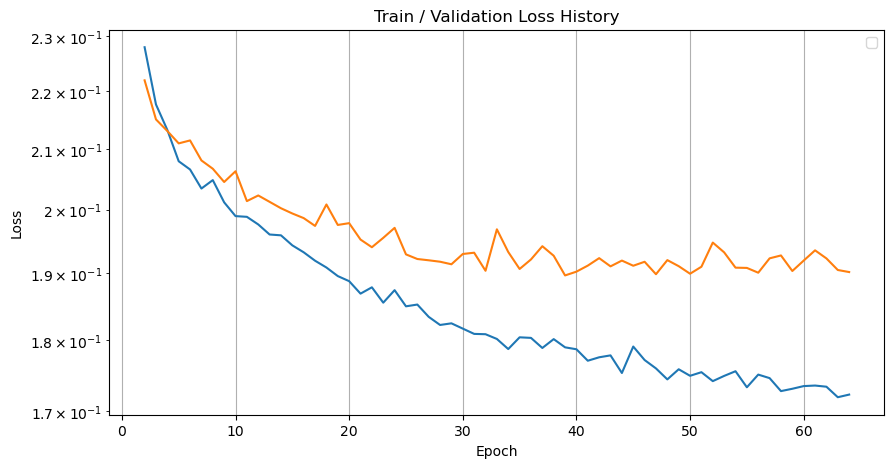

In [19]:
import matplotlib.pyplot as plt

plot_from = 2

plt.figure(figsize=(10, 5))
plt.grid(True)
plt.title("Train / Validation Loss History")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train Loss", "Validation Loss"])
plt.plot(
    range(plot_from, len(train_history)), train_history[plot_from:],
    range(plot_from, len(valid_history)), valid_history[plot_from:],
)
plt.yscale("log")
plt.show()

In [20]:
test_loss = 0
y_hat = []

with torch.no_grad():
    x_ = x[2].split(batch_size, dim=0)
    y_ = y[2].split(batch_size, dim=0)

    for x_i, y_i in zip(x_, y_):
        y_hat_i = model(x_i)
        loss = F.binary_cross_entropy(y_hat_i, y_i)

        test_loss += loss

        y_hat += [y_hat_i]


test_loss = test_loss / len(x_)
y_hat = torch.cat(y_hat, dim=0)


print("테스트 손실 값: %.4e" % test_loss)

테스트 손실 값: 2.0142e-01


In [21]:
correct_count = (y[2] == (y_hat > .5)).sum()
total_count = float(y[2].size(0))

print("테스트 정확도: %.4f" % (correct_count / total_count))

테스트 정확도: 0.9137


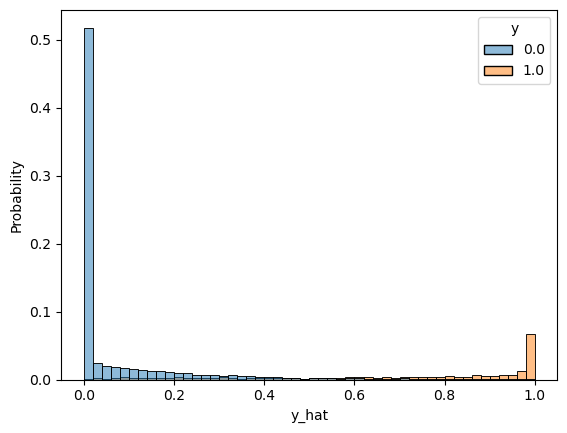

In [22]:
import seaborn as sns

df = pd.DataFrame(torch.cat([y[2], y_hat], dim=1).detach().numpy(), columns=["y", "y_hat"])

sns.histplot(df, x="y_hat", hue="y", bins=50, stat="probability")
plt.show()

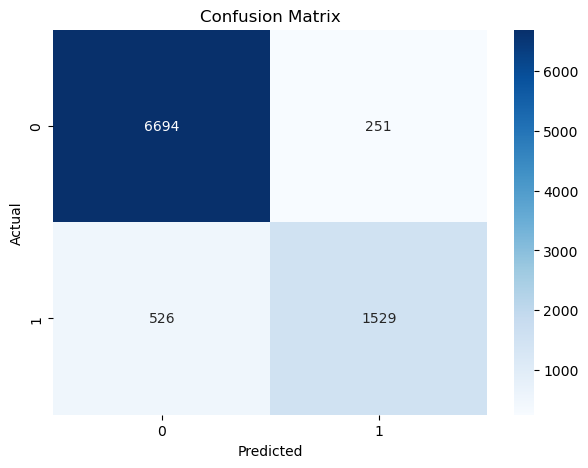

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 예측값을 0.5를 기준으로 이진화
y_pred_binary = (df['y_hat'] >= 0.5).astype(int)

# 혼동 행렬 계산
cm = confusion_matrix(df['y'], y_pred_binary)

# 시각화
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [29]:
from sklearn.metrics import f1_score, classification_report

# 예측값을 0과 1로 이진화 (threshold = 0.5)
y_pred = (y_hat > 0.5).float()

# F1 점수 계산
f1 = f1_score(y[2], y_pred)

print(f"F1 Score: {f1:.4f}")

# 더 자세한 분류 보고서 출력 (precision, recall, f1-score 포함)
print("\nClassification Report:")
print(classification_report(
    y[2], 
    y_pred,
    target_names=['대출 거절', '대출 승인']
))

F1 Score: 0.7974

Classification Report:
              precision    recall  f1-score   support

       대출 거절       0.93      0.96      0.95      6945
       대출 승인       0.86      0.74      0.80      2055

    accuracy                           0.91      9000
   macro avg       0.89      0.85      0.87      9000
weighted avg       0.91      0.91      0.91      9000



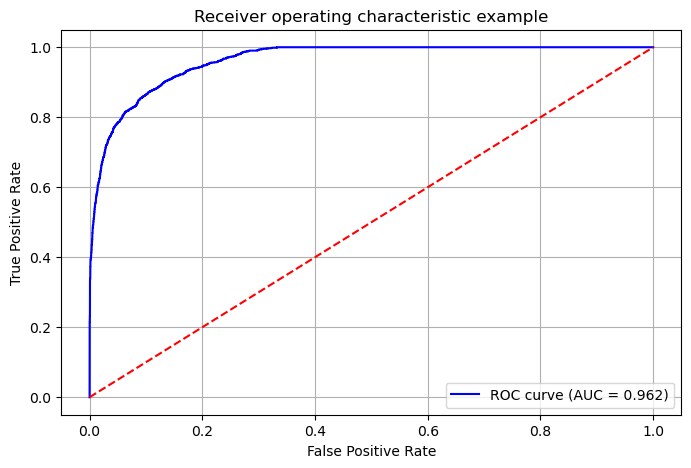

0.9619952389210323

In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# ROC 커브 계산
fpr, tpr, _ = roc_curve(df['y'], df['y_hat'])

# 시각화
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc_score(df["y"], df["y_hat"]):.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend()
plt.grid(True)
plt.show()

roc_auc_score(df.values[:, 0], df.values[:, 1])

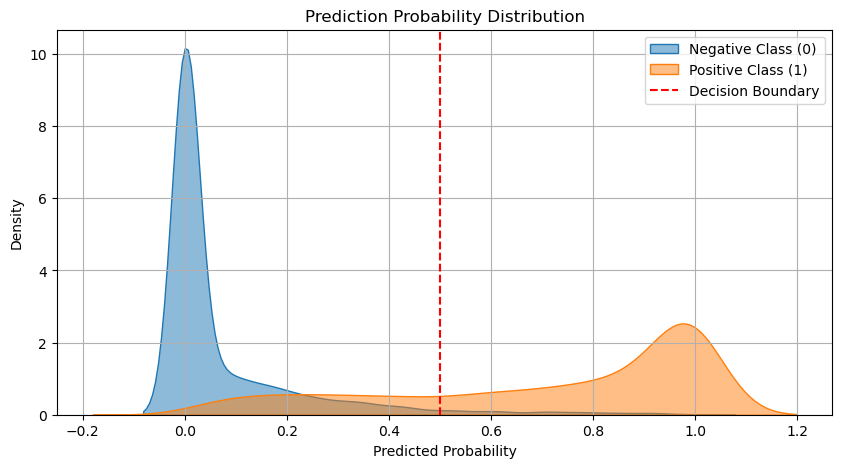

In [26]:
# 더 상세한 예측 확률 분포
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df[df['y'] == 0]['y_hat'], 
            label='Negative Class (0)', 
            fill=True, alpha=0.5)
sns.kdeplot(data=df[df['y'] == 1]['y_hat'], 
            label='Positive Class (1)', 
            fill=True, alpha=0.5)
plt.axvline(x=0.5, color='red', linestyle='--', label='Decision Boundary')
plt.title('Prediction Probability Distribution')
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()